Sales Summary by Product:
       product  total_qty   revenue
0  Headphones         17   35400.0
1      Laptop          5  254000.0
2      Mobile          8  117000.0


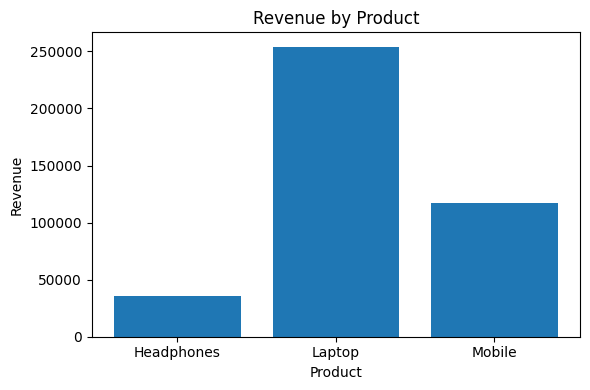


Overall Totals:
    total_units  total_revenue
0           30       406400.0


In [1]:
# Basic Sales Summary from SQLite in Python (Notebook version)

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1) Connect or create the database file in the current folder
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# 2) Create table (if not exists)
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# 3) Reset data so repeated runs don't double-insert
cur.execute("DELETE FROM sales")

# 4) Insert sample rows
rows = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 52000),
    ("Mobile", 5, 15000),
    ("Mobile", 3, 14000),
    ("Headphones", 10, 2000),
    ("Headphones", 7, 2200)
]
cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", rows)
conn.commit()

# 5) Query totals by product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# 6) Print the results
print("Sales Summary by Product:\n", df)

# 7) Simple bar chart (revenue by product)
plt.figure(figsize=(6,4))         # one chart, no special colors
plt.bar(df["product"], df["revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")    # saved to your current folder
plt.show()

# 8) (Optional) One more SQL query for overall totals
df2 = pd.read_sql_query("""
    SELECT SUM(quantity) AS total_units,
           SUM(quantity * price) AS total_revenue
    FROM sales
""", conn)
print("\nOverall Totals:\n", df2)

conn.close()
